#Algoritmo de Strassen para multiplicação de matrizes


#### link para o repositorio: [Algoritmo de Strassen](https://github.com/AndrewMBarros/Algoritmos-e-Estruturas-de-Dados-2/tree/main/Algoritmo%20de%20Strassen)


- [x] Teoria do algoritmo
- [x]  Implementacao e tempo de execucao (subalgoritmos e total)
- [x]  Teorema mestre para complexidade


## **Teoria**
O algoritmo é subdividido em 4 etapas de acordo com o livro do *Cormen*

### **etapa 1**
Dividir as matrizes de entrada A e B

<br>

### **etapa 2**
Criar 10 matrizes S1, S2, … , S10, cada uma das quais é n/2 × n/2 e é a soma ou diferença de duas matrizes criadas
na etapa 1:

$S_1 = B_{12} - B_{22}$,<br>
$S_2 = A_{11} + A_{12}$,<br>
$S_3 = A_{21} + A_{22}$,<br>
$S_4 = B_{21} - B_{11}$,<br>
$S_5 = A_{11} + A_{22}$,<br>
$S_6 = B_{11} + B_{22}$,<br>
$S_7 = A_{12} - A_{22}$,<br>
$S_8 = B_{21} + B_{22}$,<br>
$S_9 = A_{11} - A_{21}$,<br>
$S_{10} = B_{11} + B_{12}$,<br>
Podemos criar todas as 10 matrizes no tempo Θ(n²).

<br>

### **etapa 3**
Usando as submatrizes criadas na etapa 1 e as 10 matrizes criadas na etapa 2, calcular recursivamente sete
produtos de matrizes P1, P2 , … , P7. Cada matriz Pi é n/2 × n/2.

<br>

$P_1 = A_{11} \cdot S_1 = A_{11} \cdot B_{12} - A_{11} \cdot B_{22}$,  
$P_2 = S_2 \cdot B_{22} = A_{11} \cdot B_{22} + A_{12} \cdot B_{22}$,  
$P_3 = S_3 \cdot B_{11} = A_{21} \cdot B_{11} + A_{22} \cdot B_{11}$,  
$P_4 = A_{22} \cdot S_4 = A_{22} \cdot B_{21} - A_{22} \cdot B_{11}$,  
$P_5 = S_5 \cdot S_6 = A_{11} \cdot B_{11} + A_{11} \cdot B_{22} + A_{22} \cdot B_{11} + A_{22} \cdot B_{22}$,  
$P_6 = S_7 \cdot S_8 = A_{12} \cdot B_{21} + A_{12} \cdot B_{22} - A_{22} \cdot B_{21} - A_{22} \cdot B_{22}$,  
$P_7 = S_9 \cdot S_{10} = A_{11} \cdot B_{11} + A_{11} \cdot B_{12} - A_{21} \cdot B_{11} - A_{21} \cdot B_{12}$.  

<br>

### **etapa 4**
Calcular as submatrizes desejadas C11, C12, C21, C22 da matriz resultado C somando e subtraindo várias
combinações das $P_i$ matrizes. Podemos calcular todas as quatro submatrizes no tempo Θ(n²).

$C_{11} = P_5 + P_4 - P_2 + P_6$

$C_{12} = P_1 + P_2$

$C_{21} = P_3 + P_4$

$C_{22} = P_5 + P_1 - P_3 - P_7$


## Definição teorema mestre
O teorema mestre define que se temos a recorrência:

$T(n) = a * T(n/b) + f(n)$

onde $a>=1$,

$b > 1$ e

$f(n)$ nao negativa

(1) Se $f(n) < n^{log_b a}$, então $T(n) = θ(n^{log_b a})$

(2) Se $f(n) = n^{log_b a}$, então $T(n) = θ(f(n)*log_2 n)$

(3) Se $f(n) > n^{log_b a}$, então $T(n) = θ(f(n))$

##aplicação teorema mestre
Como veremos no código as funções de soma de matrizes e da criação de matrizes A e B e o calculo das 4 submatrizes são O(n²), isso implica que
$f(n) = n^{2}$

<br>

Para a recursão ou seja chamada das multiplicações de matrizes P1...P7 cada um dos passos divide as 2 submatrizes em n/2, logo temos $7*(n/2)$

<br>

Podemos então formar a equação do teorema mestre: $T(n) = 7(n/2) + n²$

<br>



Resolvendo a recorrencia temos: $n^{log_2 7} = n^{2,81}$, mas $f(n) = n^2 < n^{2,81} => T(n) = θ(n^{2,81})$, logo a complexidade para esse algoritmo é $n^{2,81}$, o que é relativamente mais rápido que $n^3$ que é a complexidade da multiplicação direta.



Text(0, 0.5, 'Tempo')

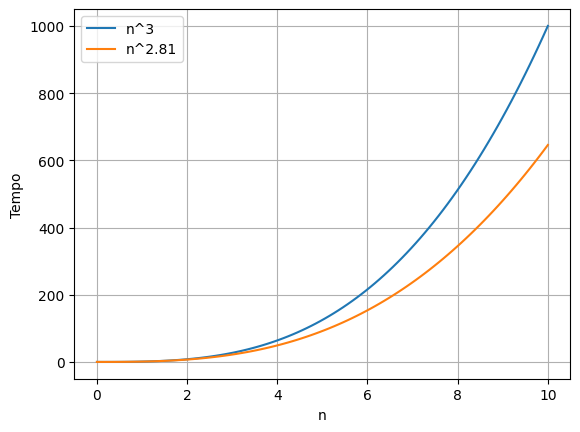

In [ ]:
#Comparativo n ** 3 e n ** 2.81

import matplotlib.pyplot as plt
import numpy as np

arr = np.linspace(0, 10, 100)
n_cubo = arr **(3)
n_281 = arr **(2.81)

plt.plot(arr, n_cubo, label='n^3')
plt.plot(arr, n_281, label='n^2.81')
plt.legend()

plt.grid()
plt.xlabel('n')
plt.ylabel('Tempo')

##Subalgoritmos
Resumidamente temos os 4 subalgoritmos:

1. Divisao das matrizes A e B em submatrizes n/2 x n/2

2. Criação das 10 matrizes $S1, ..., S10$

3. Calcular $P1, ..., P7$

4. Calcular $C11, C12, C21, C22$


In [ ]:
#O(n²)
def matrix_add(A, B):
    #list comprehension retornando matriz onde cada elemento é a soma
    return [[A[i][j] + B[i][j] for j in range(len(A[0]))] for i in range(len(A))]


In [ ]:
#O(n²)
def matrix_sub(A, B):
    #list comprehension retornando matriz onde cada elemento é a subtracao
    return [[A[i][j] - B[i][j] for j in range(len(A[0]))] for i in range(len(A))]

In [ ]:
#O(n²)
def combine(C1, C2, C3, C4):
    n = len(C1)
    #list comprehension preenchendo com zeros
    C = [[0 for _ in range(2 * n)] for _ in range(2 * n)]

    for i in range(n):
        for j in range(n):
            C[i][j] = C1[i][j]
            C[i][j + n] = C2[i][j]
            C[i + n][j] = C3[i][j]
            C[i + n][j + n] = C4[i][j]
    return C


In [ ]:
import time
tempos = [0.0, 0.0, 0.0, 0.0]  # [divisao, S, P, C]


def strassenAlgorithm(A, B):

  #Faz parte do subalgoritmo 3
  #-------------------------------

  start = time.perf_counter()
  n = len(A)

  if n == 1:
    result = [[A[0][0] * B[0][0]]]
    tempos[2] += time.perf_counter() - start
    return result

  if n == 2:
    c11 = A[0][0] * B[0][0] + A[0][1] * B[1][0]
    c12 = A[0][0] * B[0][1] + A[0][1] * B[1][1]
    c21 = A[1][0] * B[0][0] + A[1][1] * B[1][0]
    c22 = A[1][0] * B[0][1] + A[1][1] * B[1][1]
    result = [[c11, c12], [c21, c22]]
    tempos[2] += time.perf_counter() - start
    return result

  #-------------------------------



#subalgoritmo 1:
  start1 = time.time()
  meio = n // 2

  A11 = [row[:meio] for row in A[:meio]]
  A12 = [row[meio:] for row in A[:meio]]
  A21 = [row[:meio] for row in A[meio:]]
  A22 = [row[meio:] for row in A[meio:]]

  B11 = [row[:meio] for row in B[:meio]]
  B12 = [row[meio:] for row in B[:meio]]
  B21 = [row[:meio] for row in B[meio:]]
  B22 = [row[meio:] for row in B[meio:]]
  end1 = time.time()
  tempos[0] += end1 - start1

#Subalgoritmo 2:
  start2 = time.time()

  S1 = matrix_sub(B12, B22)
  S2 = matrix_add(A11, A12)
  S3 = matrix_add(A21, A22)
  S4 = matrix_sub(B21, B11)
  S5 = matrix_add(A11, A22)
  S6 = matrix_add(B11, B22)
  S7 = matrix_sub(A12, A22)
  S8 = matrix_add(B21, B22)
  S9 = matrix_sub(A11, A21)
  S10 = matrix_add(B11, B12)

  end2 = time.time()
  tempos[1] += end2 - start2

#Subalgoritmo 3:

#P1 = A11 * S1
#P2 = S2 * B22
#P3 = S3 * B11
#P4 = A22 * S4
#P5 = S5 * S6
#P6 = S7 * S8
#P7 = S9 * S10
  start3 = time.perf_counter()

  P1 = strassenAlgorithm(A11, S1)
  P2 = strassenAlgorithm(S2, B22)
  P3 = strassenAlgorithm(S3, B11)
  P4 = strassenAlgorithm(A22, S4)
  P5 = strassenAlgorithm(S5, S6)
  P6 = strassenAlgorithm(S7, S8)
  P7 = strassenAlgorithm(S9, S10)

  tempos[2] += time.perf_counter() - start3

#Subalgoritmo 4:

  #C11 = P5 + P4 - P2 + P6
  #C12 = P1 + P2
  #C21 = P3 + P4
  #C22 = P5 + P1 - P3 - P7

  start4 = time.time()

  C11 = matrix_add(matrix_sub(matrix_add(P5, P4), P2), P6)
  C12 = matrix_add(P1, P2)
  C21 = matrix_add(P3, P4)
  C22 = matrix_sub(matrix_sub(matrix_add(P5, P1), P3), P7)

  end4 = time.time()
  tempos[3] += end4 - start4

  return combine(C11, C12, C21, C22)


In [ ]:
A = [
    [1, 2, 3, 4],
    [5, 6, 7, 8],
    [9, 10, 11, 12],
    [13, 14, 15, 16]
]

B = [
    [17, 18, 19, 20],
    [21, 22, 23, 24],
    [25, 26, 27, 28],
    [29, 30, 31, 32]
]

In [ ]:
start_= time.time()
C = strassenAlgorithm(A, B)
end_ = time.time()
print(f"Tempo total de execução: {end_ - start_} segundos")

Tempo de execução: 0.00024700164794921875 segundos


In [ ]:
C

[[250, 260, 270, 280],
 [618, 644, 670, 696],
 [986, 1028, 1070, 1112],
 [1354, 1412, 1470, 1528]]

In [ ]:
# Exibir tempos
print(f"Tempo - Subalgoritmo 1 (Divisão): {tempos[0]:.6f} segundos")
print(f"Tempo - Subalgoritmo 2 (S1..S10): {tempos[1]:.6f} segundos")
print(f"Tempo - Subalgoritmo 3 (P1..P7):  {tempos[2]:.6f} segundos")
print(f"Tempo - Subalgoritmo 4 (Cij):     {tempos[3]:.6f} segundos")


Tempo - Subalgoritmo 1 (Divisão): 0.000014 segundos
Tempo - Subalgoritmo 2 (S1..S10): 0.000047 segundos
Tempo - Subalgoritmo 3 (P1..P7):  0.000045 segundos
Tempo - Subalgoritmo 4 (Cij):     0.000018 segundos


Podemos ver que há uma diferença entre o tempo contabilizado usando:

```python
start_= time.time()
C = strassenAlgorithm(A, B)
end_ = time.time()
```

E pela soma dos 4 subalgoritmos que é definido. Isso se dá por overheads que existem no meio das chamadas recursivas (empilhamento, garbage collector, etc.)
